# 데이터 불러오기

- 멕시코풍 프랜차이즈  chipotle의 주문 데이터 분석하기

In [52]:
import pandas as pd

In [53]:
chipo = pd.read_csv("./analysis/data/chipotle.tsv", sep = "\t")

In [54]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


# 데이터 탐색

### 피처 
- order_id : 주문번호
- quantity : 아이템의 주문 수량
- item_name : 주문한 아이템의 이름
- choice_description : 주문한 아이템의 상세 선택 옵션
- item_price : 주문 아이템의 가격 정보

In [55]:
chipo.shape

(4622, 5)

In [56]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


- choice_description의 결측값 존재
- order_id는 숫자의 의미를 가지고 있지 않기 때문에 str으로 변환한다.

In [57]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


- 아이템의 평균 주문 수량은 약 1.08
    - 대부분이 한 아이템에 대해서 1개 정도만 주문함, 한 사람이 같은 메뉴를 여러 개 구매하는 경우는 많지 않다.
    
- order_id 피처는 숫자의 의미가 없으므로 str로 바꾸어준다.
- item_price는 수치적 특징을 보기 위해서 수치형으로 변환해준다.

In [58]:
chipo["order_id"] = chipo["order_id"].astype(str)

In [59]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


### 가장 많이 주문한 아이템 Top 10

In [61]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [83]:
item_count = chipo["item_name"].value_counts()[:10]

In [103]:
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1) :
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


### 아이템별 주문 횟수

In [109]:
order_count = chipo.groupby("item_name")["order_id"].count()

In [110]:
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [111]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### 아이템별 총량

In [112]:
item_quantity = chipo.groupby("item_name")["quantity"].sum()

In [113]:
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

### 시각화
- 아이템별 총량

In [114]:
import matplotlib.pyplot as plt
import numpy as np

In [131]:
item_quantity_sort = item_quantity.sort_values(ascending=False)

In [138]:
# item 수가 너무 많고 영어이기 때문에 다 표현할 수 없으므로 숫자로 변환하자
x_pos = np.arange(len(item_quantity_sort.index.tolist()))

In [140]:
order_cnt = item_quantity_sort.values.tolist()

In [145]:
item_quantity_sort.index[:10]

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Chips', 'Steak Bowl',
       'Bottled Water', 'Chips and Fresh Tomato Salsa', 'Canned Soda'],
      dtype='object', name='item_name')

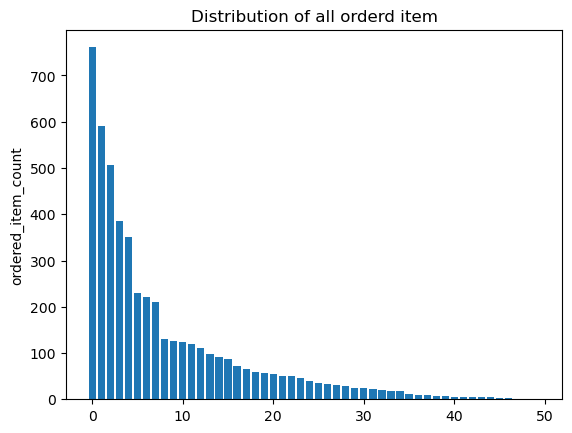

In [143]:
plt.bar(x_pos, order_cnt)
plt.ylabel("ordered_item_count")
plt.title("Distribution of all orderd item")

plt.show()

# 데이터 전처리

- item_price를 문자열 타입에서 전처리하자

In [146]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


- item_price의 값마다 $가 붙어있음
    - 이를 제거하자

In [149]:
chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x[1:]))

In [150]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB


In [151]:
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


### 주문당 평균 계산금액

In [157]:
chipo.groupby("order_id")["item_price"].sum().mean()

18.811428571428717

In [275]:
chipo.groupby("order_id")["item_price"].sum()

10.08

- 한 사람이 약 19달러를 주문함

### 한 주문에 10달러 이상 지불한 주문 번호

In [196]:
chipo_orderid_group = chipo.groupby("order_id")["item_price"].sum()

In [199]:
chipo_orderid_group[chipo_orderid_group.values >= 10][:10]

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
1002    10.68
1003    13.00
1004    21.96
1005    12.15
1006    71.40
Name: item_price, dtype: float64

### 각 아이템의 가격 유추

In [204]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [207]:
chipo_one_item = chipo[chipo.quantity == 1]

In [213]:
price_item = chipo_one_item.groupby("item_name").min()

In [214]:
price_item.head()

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,1076,1,[Coke],6.49
Barbacoa Bowl,1000,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,1002,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,110,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39


In [217]:
price_item.sort_values(by = "item_price", ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [277]:
price_item.sort_values(by = "item_price", ascending = True)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Bottled Water,1009,1,NaN,1.09
Canned Soda,100,1,[Coca Cola],1.09
Canned Soft Drink,1003,1,[Coke],1.25
Side of Chips,1002,1,NaN,1.69
Chips,1005,1,NaN,1.99
Chips and Fresh Tomato Salsa,1,1,NaN,2.29
Chips and Tomatillo-Red Chili Salsa,1215,1,NaN,2.39
Chips and Tomatillo-Green Chili Salsa,1,1,NaN,2.39
Chips and Roasted Chili-Corn Salsa,1156,1,NaN,2.39


### 시각화

- 아이템의 가격 분포

In [222]:
x_pos = np.arange(len(price_item))

In [235]:
item_price = price_item["item_price"].tolist()

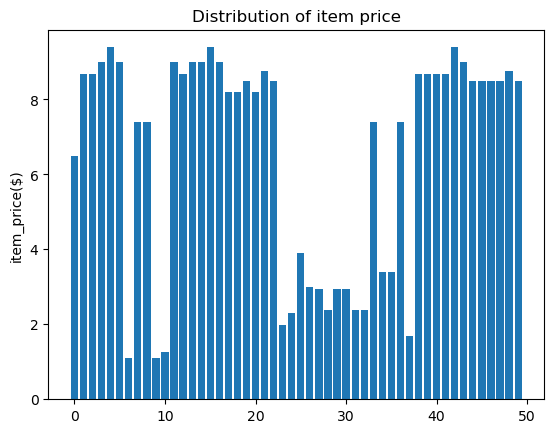

In [236]:
plt.bar(x_pos, item_price)
plt.ylabel("item_price($)")
plt.title("Distribution of item price")
plt.show()

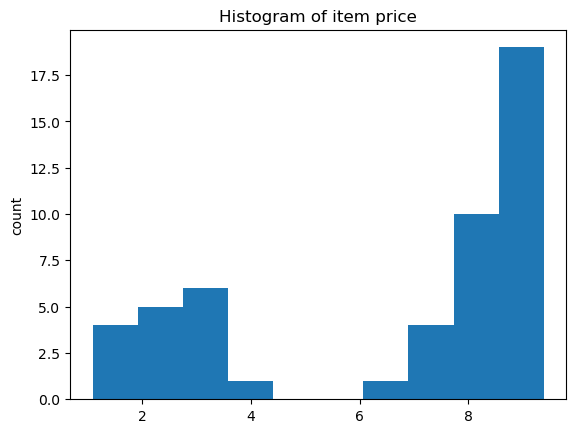

In [232]:
plt.hist(item_price)
plt.ylabel("count")
plt.title("Histogram of item price")
plt.show()

### 가장 비싼 주문에서 아이템이 총 몇 개 팔렸나

In [242]:
chipo.groupby("order_id").sum().sort_values(by = "item_price", ascending = False)

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
...,...,...
1014,2,10.08
730,2,10.08
14,2,10.08


- 23개 주문으로 총 금액은 205.25$로 확인

### Veggie Salad Bowl이 몇 번 주문되었는가

In [243]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [249]:
chipo_veggie = chipo[chipo["item_name"] == "Veggie Salad Bowl"]

In [268]:
chipo_veggie.head()

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [270]:
# order_id 중복행 제거
chipo_veggie = chipo_veggie.drop_duplicates(["item_price", "order_id"])

In [272]:
len(chipo_veggie)

18

# 정리

| 탐색 | 해당 피처 | 인사이트 |
|---|---|---|
| 가장 많이 주문된 아이템 | item_name | Chicken Bowl이 가장 인기 있는 아이템으로 확인 |
| 주문된 전체 아이템 종류 | item_name | 총 50개의 주문된 아이템 확인 |
| 아이템의 가격 | item_price | 아이템의 판매 가격은 1-9달러까지 있으며 대부분 2-4, 혹은 6-8달러 정도로 확인|
